# House Price Prediction With ANN

House price prediction using Artificial Neural Networks (ANN) is a popular application of machine learning and predictive analytics. ANNs are powerful models that can learn patterns and relationships from historical data to make predictions on new, unseen data. When it comes to house price prediction, an ANN can analyze various features or attributes of a house, such as its size, location, number of rooms, amenities, and more, to estimate its corresponding price.

# Importing Python Libraries

Importing libraries is an essential step in any data analysis or machine learning project. These libraries provide various functions and tools to manipulate, visualize, and analyze data efficiently. Here are explanations of some popular data analysis libraries:

Pandas: Pandas is a powerful and widely used library for data manipulation and analysis. It provides data structures like DataFrames and Series, which allow you to store and manipulate tabular data. Pandas offers a wide range of functions for data cleaning, filtering, aggregation, merging, and more. It also supports reading and writing data from various file formats such as CSV, Excel, SQL databases, and more.

NumPy: NumPy (Numerical Python) is a fundamental library for scientific computing in Python. It provides efficient data structures like arrays and matrices and a vast collection of mathematical functions. NumPy enables you to perform various numerical operations on large datasets, such as element-wise calculations, linear algebra, Fourier transforms, and random number generation. It also integrates well with other libraries for data analysis and machine learning.

Matplotlib: Matplotlib is a popular plotting library that enables you to create a wide range of static, animated, and interactive visualizations. It provides a MATLAB-like interface and supports various types of plots, including line plots, scatter plots, bar plots, histograms, and more. Matplotlib gives you extensive control over plot customization, including labels, colors, legends, and annotations, allowing you to effectively communicate insights from your data

Seaborn: Seaborn is a statistical data visualization library that is built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn simplifies the process of creating complex visualizations like heatmaps, kernel density plots, violin plots, and regression plots. It also offers additional functionalities for handling categorical data, multi-plot grids, and color palettes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [3]:
dataframe = pd.read_csv('data.csv')

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and summarizing the main characteristics of a dataset. Its main objective is to gain insights, discover patterns, and understand the structure of the data before proceeding with more advanced analysis or modeling techniques

In [4]:
dataframe.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
dataframe.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
dataframe.shape

(4600, 18)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
dataframe.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [10]:
dataframe.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# Data Visualization

Data visualization is the graphical representation of data using visual elements such as charts, graphs, maps, and other visual tools. It aims to present complex data in a visual format that is easy to understand, interpret, and communicate

<AxesSubplot:xlabel='price', ylabel='Density'>

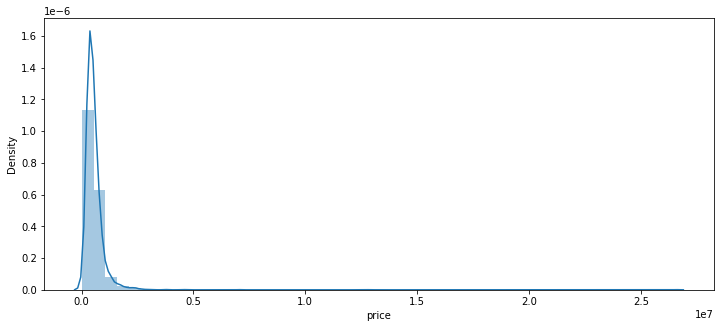

In [11]:
plt.figure(figsize = (12, 5))
sns.distplot(dataframe['price'])

In [12]:
dataframe.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [13]:
dataframe['bedrooms'].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

<AxesSubplot:>

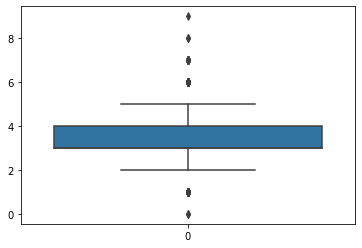

In [14]:
sns.boxplot(dataframe['bedrooms'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

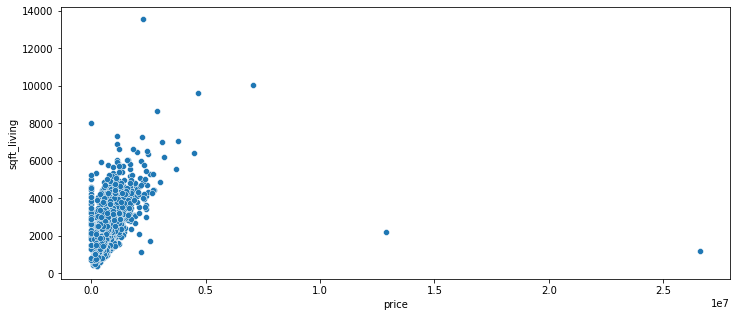

In [15]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'price', y = 'sqft_living', data = dataframe)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

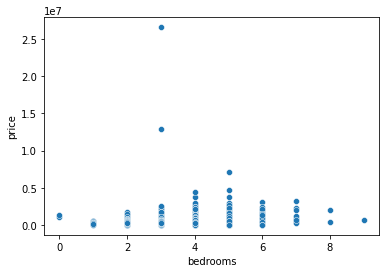

In [16]:
sns.scatterplot(x = 'bedrooms', y = 'price', data = dataframe)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

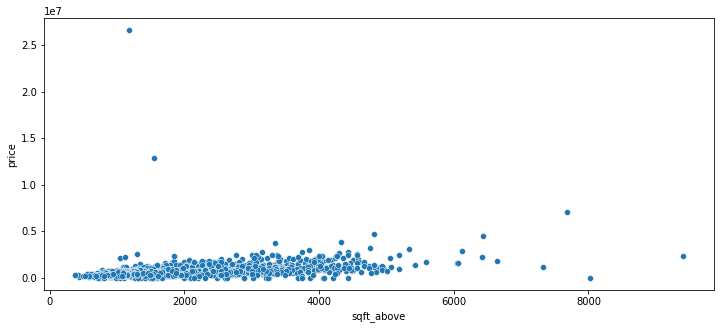

In [17]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'sqft_above', y = 'price', data = dataframe)

<AxesSubplot:xlabel='price', ylabel='sqft_basement'>

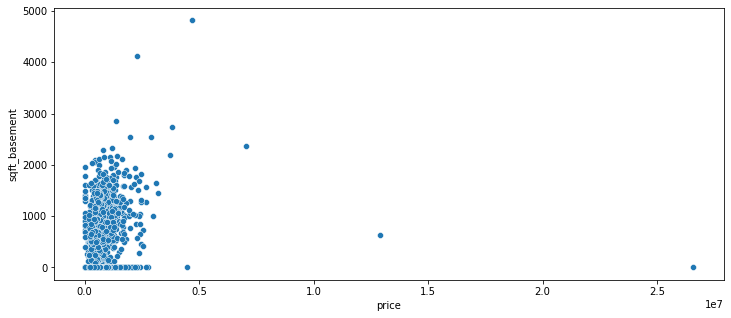

In [18]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'price', y = 'sqft_basement', data = dataframe)

<AxesSubplot:xlabel='sqft_above', ylabel='sqft_basement'>

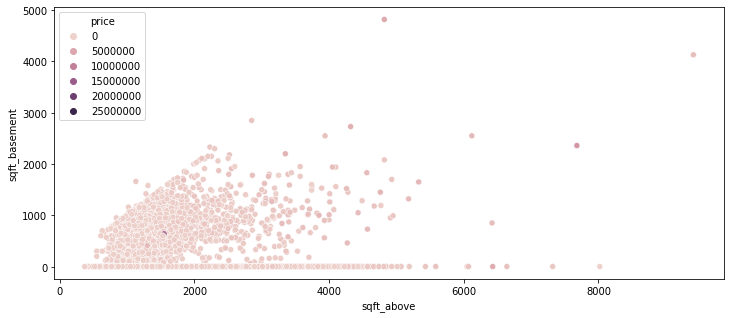

In [19]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'sqft_above', y = 'sqft_basement', data = dataframe, hue = 'price')

In [20]:
dataframe.sort_values('price', ascending = False).head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA
4346,2014-06-23 00:00:00,12899000.0,3.0,2.50,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2761,2014-06-18 00:00:00,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA
3729,2014-07-01 00:00:00,3800000.0,5.0,5.50,7050,42840,1.0,0,2,4,4320,2730,1978,2000,1365 91st Ave NE,Clyde Hill,WA 98004,USA
1637,2014-05-30 00:00:00,3710000.0,4.0,3.50,5550,28078,2.0,0,2,4,3350,2200,2000,0,3222 78th Pl NE,Medina,WA 98039,USA
252,2014-05-07 00:00:00,3200000.0,7.0,4.50,6210,8856,2.5,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA
1567,2014-05-29 00:00:00,3100000.0,6.0,4.25,6980,15682,3.0,0,4,4,5330,1650,1999,0,5243 Forest Ave SE,Mercer Island,WA 98040,USA
2772,2014-06-18 00:00:00,3000000.0,4.0,4.25,4850,12445,2.0,1,4,5,3850,1000,1989,0,11031 Champagne Point Rd NE,Kirkland,WA 98034,USA


In [21]:
len(dataframe)*(0.01)

46.0

In [22]:
top_1_percent = dataframe.sort_values('price', ascending = False).iloc[46:]

<AxesSubplot:xlabel='sqft_above', ylabel='sqft_basement'>

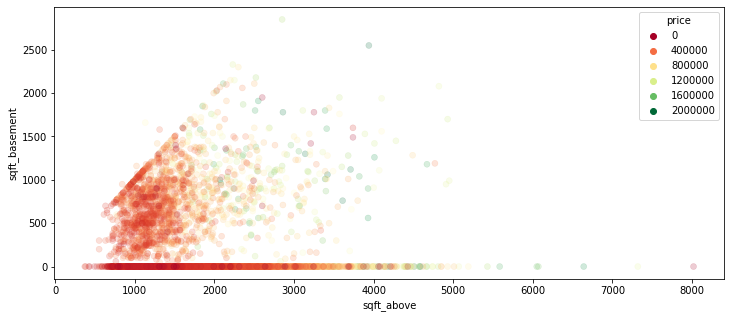

In [23]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'sqft_above', y = 'sqft_basement', data = top_1_percent, 
                hue = 'price', palette = 'RdYlGn',
                edgecolor = None, alpha = 0.2)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

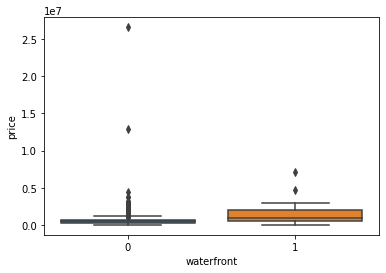

In [24]:
sns.boxplot(x = 'waterfront', y = 'price', data = dataframe)

# Feature Engineering From Date

Feature engineering from date variables involves extracting relevant information or creating new features from date-related data

Dates have various components such as year, month, day, day of the week, quarter, etc. Extracting these components as separate features can provide valuable information. For example, you can extract the month and create a feature indicating the season (e.g., spring, summer, fall, winter) based on the month

In [25]:
dataframe.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [29]:
dataframe['date'] = pd.to_datetime(dataframe['date'])

In [31]:
dataframe['month'] = dataframe['date'].apply(lambda date:date.month)

In [33]:
dataframe['year'] = dataframe['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

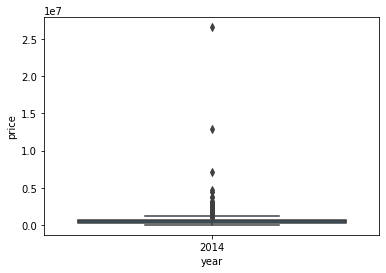

In [36]:
sns.boxplot(x = 'year', y = 'price', data = dataframe)

<AxesSubplot:xlabel='month', ylabel='price'>

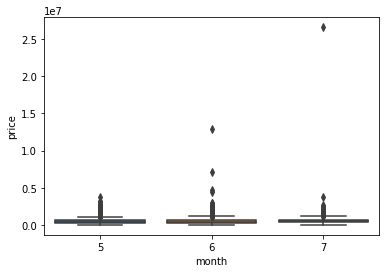

In [37]:
sns.boxplot(x = 'month', y = 'price', data = dataframe)

<AxesSubplot:xlabel='month'>

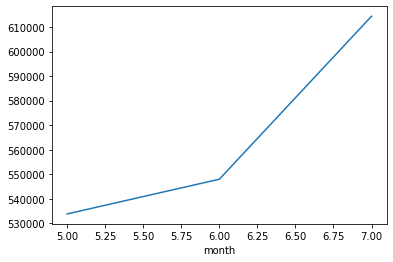

In [38]:
dataframe.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

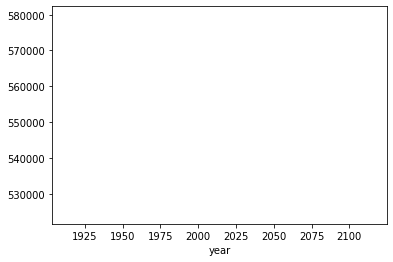

In [39]:
dataframe.groupby('year').mean()['price'].plot()

In [40]:
dataframe.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month,year
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,5,2014
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,5,2014
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,5,2014
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,5,2014
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5,2014


In [41]:
dataframe = dataframe.drop('date', axis = 1)

In [43]:
dataframe.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month,year
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,5,2014
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,5,2014
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,5,2014
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,5,2014
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5,2014


In [44]:
dataframe.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'month', 'year'],
      dtype='object')

In [45]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  month          4600 non-null   int64  
 14  year           4600 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 539.2 KB


In [46]:
dataframe['yr_renovated'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2005
1          0
2          0
3          0
4       1992
        ... 
4595    1979
4596    2009
4597       0
4598       0
4599       0
Name: yr_renovated, Length: 4600, dtype: int64>

In [47]:
dataframe['yr_built'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1955
1       1921
2       1966
3       1963
4       1976
        ... 
4595    1954
4596    1983
4597    2009
4598    1974
4599    1990
Name: yr_built, Length: 4600, dtype: int64>

# Splitting The Data

Splitting the data refers to dividing the dataset into separate subsets for training, validation, and testing purposes. This division is essential to assess the performance of a machine learning model on unseen data and prevent overfitting. Here are the common types of data splits:

Training Set: The training set is the largest subset of the data used to train the machine learning model. It is used to learn the underlying patterns and relationships between the input features and the target variable. Typically, around 70-80% of the data is allocated for training

Validation Set: The validation set is used to tune and optimize the model during the training process. It helps in selecting hyperparameters, evaluating different models, and making decisions about model architecture or feature selection. The validation set aids in preventing overfitting by providing an unbiased evaluation of the model's performance. It is generally around 10-20% of the data.

Test Set: The test set is used to assess the final performance of the trained model. It represents unseen data that the model has not been exposed to during training or validation. The test set helps estimate the model's generalization ability and provides a reliable measure of its performance on real-world data. Typically, it comprises 10-20% of the data

In [48]:
x = dataframe.drop('price', axis = 1)
y = dataframe['price']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# Scaling The Data

Scaling the data is a preprocessing step that involves transforming the numerical features of a dataset to a similar scale or range. It ensures that all features contribute equally to the analysis and modeling process, regardless of their original units or scales. Here's a description of common scaling techniques:

Min-Max Scaling: Min-max scaling, also known as normalization, rescales the data to a fixed range, typically between 0 and 1. It subtracts the minimum value of the feature and divides by the range (difference between the maximum and minimum values). This technique preserves the relative relationships between data points but maps them to a common range.

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()

In [55]:
x_train= scaler.fit_transform(x_train)

In [56]:
x_test = scaler.transform(x_test)

In [58]:
x_train.shape

(3220, 14)

In [59]:
x_test.shape

(1380, 14)

# Importing Deep Learning Libraries

Importing deep learning libraries allows you to leverage powerful tools and frameworks specifically designed for building and training deep neural networks. Here's a brief description of popular deep learning libraries:

TensorFlow: TensorFlow is an open-source deep learning library developed by Google. It provides a comprehensive ecosystem for building and training various types of neural networks. TensorFlow offers high-level APIs like Keras for ease of use and abstraction, as well as low-level APIs for fine-grained control. It supports distributed computing, GPU acceleration, and deployment on different platforms.

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Creating The Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [63]:
model = Sequential()
model.add(Dense(15, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1))

Compiling the model in deep learning involves configuring essential components that define how the model will be trained. 

In [64]:
model.compile(optimizer = 'Adam', loss = 'mse', metrics = ['accuracy'])

# Training The Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance

In [65]:
model.fit(x = x_train, 
          y = y_train.values,
          validation_data = (x_test, y_test.values),
          batch_size = 128,
          epochs = 250)

Epoch 1/250
26/26 [==============================] - 5s 33ms/step - loss: 653502447616.0000 - accuracy: 0.0087 - val_loss: 550171770880.0000 - val_accuracy: 0.0051
Epoch 2/250
26/26 [==============================] - 0s 10ms/step - loss: 653501595648.0000 - accuracy: 6.2112e-04 - val_loss: 550170525696.0000 - val_accuracy: 0.0000e+00
Epoch 3/250
26/26 [==============================] - 0s 9ms/step - loss: 653499236352.0000 - accuracy: 0.0000e+00 - val_loss: 550166462464.0000 - val_accuracy: 0.0000e+00
Epoch 4/250
26/26 [==============================] - 0s 10ms/step - loss: 653492224000.0000 - accuracy: 0.0000e+00 - val_loss: 550154600448.0000 - val_accuracy: 0.0000e+00
Epoch 5/250
26/26 [==============================] - 0s 10ms/step - loss: 653472366592.0000 - accuracy: 0.0000e+00 - val_loss: 550123995136.0000 - val_accuracy: 0.0000e+00
Epoch 6/250
26/26 [==============================] - 0s 9ms/step - loss: 653425115136.0000 - accuracy: 0.0000e+00 - val_loss: 550054789120.0000 - val

26/26 [==============================] - 0s 14ms/step - loss: 314947141632.0000 - accuracy: 0.0000e+00 - val_loss: 222370938880.0000 - val_accuracy: 0.0000e+00
Epoch 49/250
26/26 [==============================] - 0s 11ms/step - loss: 314665664512.0000 - accuracy: 0.0000e+00 - val_loss: 222130733056.0000 - val_accuracy: 0.0000e+00
Epoch 50/250
26/26 [==============================] - 0s 10ms/step - loss: 314426982400.0000 - accuracy: 0.0000e+00 - val_loss: 221856333824.0000 - val_accuracy: 0.0000e+00
Epoch 51/250
26/26 [==============================] - 0s 11ms/step - loss: 314154549248.0000 - accuracy: 0.0000e+00 - val_loss: 221625106432.0000 - val_accuracy: 0.0000e+00
Epoch 52/250
26/26 [==============================] - 0s 14ms/step - loss: 313926156288.0000 - accuracy: 0.0000e+00 - val_loss: 221415391232.0000 - val_accuracy: 0.0000e+00
Epoch 53/250
26/26 [==============================] - 0s 11ms/step - loss: 313640845312.0000 - accuracy: 0.0000e+00 - val_loss: 221137059840.0000 - 

26/26 [==============================] - 0s 16ms/step - loss: 304312844288.0000 - accuracy: 0.0000e+00 - val_loss: 211781500928.0000 - val_accuracy: 0.0000e+00
Epoch 96/250
26/26 [==============================] - 0s 14ms/step - loss: 304117645312.0000 - accuracy: 0.0000e+00 - val_loss: 211575865344.0000 - val_accuracy: 0.0000e+00
Epoch 97/250
26/26 [==============================] - 0s 14ms/step - loss: 303924609024.0000 - accuracy: 0.0000e+00 - val_loss: 211399163904.0000 - val_accuracy: 0.0000e+00
Epoch 98/250
26/26 [==============================] - 0s 10ms/step - loss: 303810969600.0000 - accuracy: 0.0000e+00 - val_loss: 211194511360.0000 - val_accuracy: 0.0000e+00
Epoch 99/250
26/26 [==============================] - 0s 11ms/step - loss: 303590047744.0000 - accuracy: 0.0000e+00 - val_loss: 210945998848.0000 - val_accuracy: 0.0000e+00
Epoch 100/250
26/26 [==============================] - 0s 12ms/step - loss: 303382069248.0000 - accuracy: 0.0000e+00 - val_loss: 210732646400.0000 -

26/26 [==============================] - 0s 12ms/step - loss: 296021131264.0000 - accuracy: 0.0000e+00 - val_loss: 202742366208.0000 - val_accuracy: 0.0000e+00
Epoch 143/250
26/26 [==============================] - 0s 13ms/step - loss: 295906508800.0000 - accuracy: 0.0000e+00 - val_loss: 202542563328.0000 - val_accuracy: 0.0000e+00
Epoch 144/250
26/26 [==============================] - 0s 11ms/step - loss: 295741784064.0000 - accuracy: 0.0000e+00 - val_loss: 202401185792.0000 - val_accuracy: 0.0000e+00
Epoch 145/250
26/26 [==============================] - 0s 12ms/step - loss: 295578173440.0000 - accuracy: 0.0000e+00 - val_loss: 202200252416.0000 - val_accuracy: 0.0000e+00
Epoch 146/250
26/26 [==============================] - 0s 13ms/step - loss: 295436025856.0000 - accuracy: 0.0000e+00 - val_loss: 202074210304.0000 - val_accuracy: 0.0000e+00
Epoch 147/250
26/26 [==============================] - 0s 11ms/step - loss: 295256293376.0000 - accuracy: 0.0000e+00 - val_loss: 201876570112.00

26/26 [==============================] - 0s 12ms/step - loss: 290317402112.0000 - accuracy: 0.0000e+00 - val_loss: 195675815936.0000 - val_accuracy: 0.0000e+00
Epoch 190/250
26/26 [==============================] - 0s 17ms/step - loss: 290185740288.0000 - accuracy: 0.0000e+00 - val_loss: 195575660544.0000 - val_accuracy: 0.0000e+00
Epoch 191/250
26/26 [==============================] - 0s 10ms/step - loss: 290104901632.0000 - accuracy: 0.0000e+00 - val_loss: 195474980864.0000 - val_accuracy: 0.0000e+00
Epoch 192/250
26/26 [==============================] - 0s 11ms/step - loss: 290093629440.0000 - accuracy: 0.0000e+00 - val_loss: 195433283584.0000 - val_accuracy: 0.0000e+00
Epoch 193/250
26/26 [==============================] - 0s 11ms/step - loss: 289962852352.0000 - accuracy: 0.0000e+00 - val_loss: 195218063360.0000 - val_accuracy: 0.0000e+00
Epoch 194/250
26/26 [==============================] - 0s 11ms/step - loss: 289860452352.0000 - accuracy: 0.0000e+00 - val_loss: 195130621952.00

26/26 [==============================] - 0s 12ms/step - loss: 286887051264.0000 - accuracy: 0.0000e+00 - val_loss: 190860787712.0000 - val_accuracy: 0.0000e+00
Epoch 237/250
26/26 [==============================] - 0s 11ms/step - loss: 286820040704.0000 - accuracy: 0.0000e+00 - val_loss: 190805540864.0000 - val_accuracy: 0.0000e+00
Epoch 238/250
26/26 [==============================] - 0s 13ms/step - loss: 286766399488.0000 - accuracy: 0.0000e+00 - val_loss: 190721867776.0000 - val_accuracy: 0.0000e+00
Epoch 239/250
26/26 [==============================] - 0s 11ms/step - loss: 286678089728.0000 - accuracy: 0.0000e+00 - val_loss: 190612930560.0000 - val_accuracy: 0.0000e+00
Epoch 240/250
26/26 [==============================] - 0s 11ms/step - loss: 286609375232.0000 - accuracy: 0.0000e+00 - val_loss: 190500470784.0000 - val_accuracy: 0.0000e+00
Epoch 241/250
26/26 [==============================] - 0s 14ms/step - loss: 286542266368.0000 - accuracy: 0.0000e+00 - val_loss: 190437228544.00

In [66]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

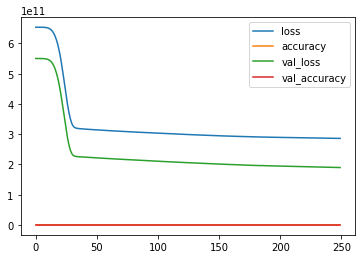

In [67]:
loss.plot()

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [71]:
x_test

array([[0.44444444, 0.44444444, 0.54584682, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.33333333, 0.20496224, ..., 0.99503476, 0.        ,
        0.        ],
       [0.44444444, 0.37037037, 0.18338727, ..., 0.99453823, 0.5       ,
        0.        ],
       ...,
       [0.33333333, 0.25925926, 0.13052859, ..., 0.        , 0.5       ,
        0.        ],
       [0.11111111, 0.2962963 , 0.08414239, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.14814815, 0.06688242, ..., 0.98709037, 0.        ,
        0.        ]])

# Predicting New Data

In [72]:
prediction = model.predict(x_test)

44/44 [==============================] - 1s 16ms/step


In [73]:
mean_absolute_error(y_test, prediction)

178390.61011263842

In [74]:
np.sqrt(mean_absolute_error(y_test, prediction))

422.3631258912624

In [75]:
explained_variance_score(y_test, prediction)

0.2598657221871373

In [76]:
dataframe['price'].describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

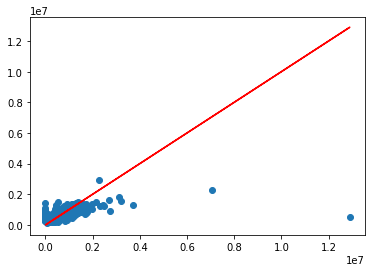

In [77]:
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, 'r')

# Prediction In Single House 

In [79]:
single_house =  dataframe.drop('price',axis=1).iloc[0]

In [81]:
single_house = scaler.transform(single_house.values.reshape(-1, 14))

In [82]:
single_house

array([[0.33333333, 0.22222222, 0.10463862, 0.00673568, 0.2       ,
        0.        , 0.        , 0.5       , 0.12679739, 0.        ,
        0.48245614, 0.99553128, 0.        , 0.        ]])

In [83]:
model.predict(single_house)

1/1 [==============================] - 0s 56ms/step


array([[352409.75]], dtype=float32)

In [84]:
dataframe.iloc[0]

price            313000.0
bedrooms              3.0
bathrooms             1.5
sqft_living        1340.0
sqft_lot           7912.0
floors                1.5
waterfront            0.0
view                  0.0
condition             3.0
sqft_above         1340.0
sqft_basement         0.0
yr_built           1955.0
yr_renovated       2005.0
month                 5.0
year               2014.0
Name: 0, dtype: float64